## Setup

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from showit import image

In [6]:
from skimage.io import imsave, imread

## Set directory and session information

In [7]:
directory = '/Users/nick/Dropbox/work/freeman/figures/2016-11-25/zooms/'

In [8]:
stack = imread(directory + 'avg_eq.tif')

In [9]:
img = stack[0]

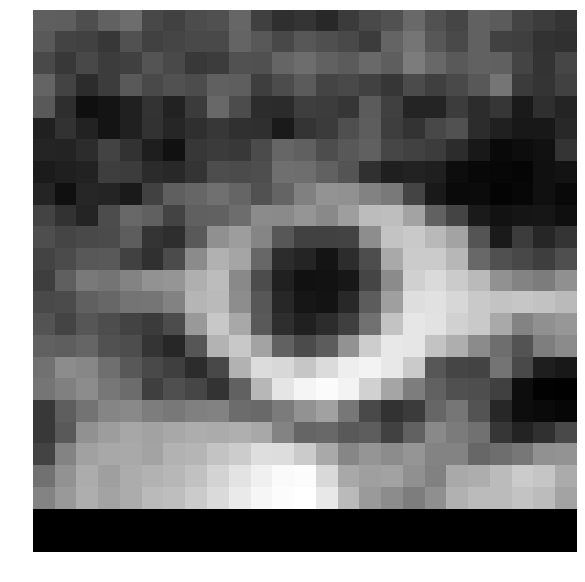

In [10]:
image(img);

In [9]:
def closing(self, size):
    """
    Close a region using morphological operators.
    Parameters
    ----------
    size : int
        Size of closing in pixels
    """
    if size > 0:
        from scipy.ndimage.morphology import binary_closing
        size = (size * 2) + 1
        coords = self.coordinates
        tmp = zeros(self.extent + size * 2)
        coords = (coords - self.bbox[0:len(self.center)] + size)
        tmp[coords.T.tolist()] = 1
        tmp = binary_closing(tmp, ones((size, size)))
        new = asarray(where(tmp)).T + self.bbox[0:len(self.center)] - size
        new = [c for c in new if all(c >= 0)]
    else:
        return self

    return one(new)

In [10]:
from numpy import percentile, where

In [11]:
def norm(im, a=0, b=100):
    im = im.astype('float')
    return (im.clip(percentile(im,a),percentile(im,b))-percentile(im,a))/(percentile(im,b)-percentile(im,a))

## Boundary detection threshold

In [12]:
from regional import one

In [13]:
def detect_thershold(image, threshold):
    image = norm(image,0,100)
    x = where(image>threshold)
    y = closing(one([[x[0][ii], x[1][ii]] for ii in range(len(x[0]))]),1)
    return many([y])

In [14]:
regions = [detect_thershold(x,0.5) for x in stack]
blend = array([overlay(regions[i], image=stack[i]) for i in range(stack.shape[0])])

NameError: global name 'zeros' is not defined

In [ ]:
image(blend[1]);

In [187]:
path = directory + 'threshold.tif'
imsave(path, (255*blend).astype('uint8'), plugin='tifffile', photometric='rgb')

## Boundary detection wand

In [15]:
from cell_magic_wand import cell_magic_wand_single_point

In [16]:
from skimage.morphology import disk, rectangle
from skimage.filters.rank import median

In [17]:
from regional import one

In [18]:
from regional import many

In [19]:
from numpy import array, where, zeros, ones, asarray, percentile

In [20]:
def detect_wand(image):
    roi,_ = array(cell_magic_wand_single_point(image, [image.shape[0]/2, image.shape[1]/2], 4, 11, roughness=10))
    x = where(roi)
    y = closing(one([[x[0][ii], x[1][ii]] for ii in range(len(x[0]))]),1)
    return many([y])

In [26]:
regions = [detect_wand(x) for x in stack]
blend = array([overlay(regions[i], image=stack[i]) for i in range(stack.shape[0])])

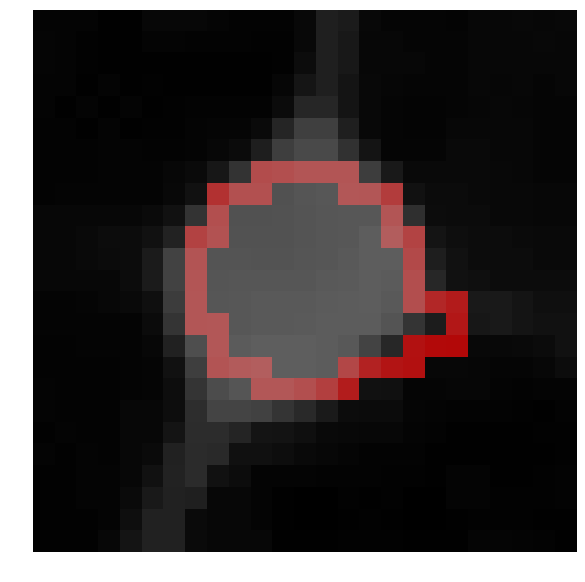

In [27]:
image(blend[124]);

In [196]:
path = directory + 'wand.tif'
imsave(path, (255*blend).astype('uint8'), plugin='tifffile', photometric='rgb')

## Boundary detection watershed_edge

In [1]:
from single_cell_detect import watershed_edge as detect

In [11]:
mask = detect(stack[1], dilationSize=1, radial=True, filterSize=5)

NameError: global name 'np' is not defined

In [2]:
from numpy import where, array
from regional import one

def mask_to_region(mask):
    coordinates = where(mask)
    return one([[coordinates[0][ii], coordinates[1][ii]] for ii in range(len(coordinates[0]))])

In [34]:
regions = [mask_to_region(detect(x, dilationSize=2, radial=True, filterSize=5)) for x in stack]
blend = array([overlay(regions[i], image=stack[i]) for i in range(stack.shape[0])])

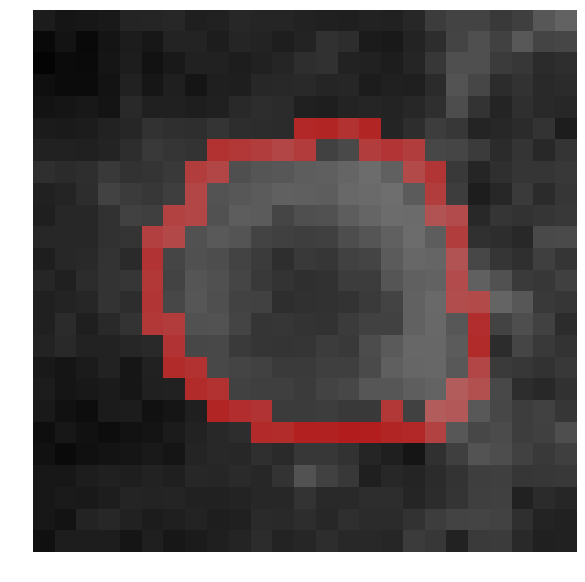

In [35]:
image(blend[4]);

In [36]:
path = directory + 'avg_p.tif'
imsave(path, (255*blend).astype('uint8'), plugin='tifffile', photometric='rgb')

## WIP

In [3]:
from single_cell_detect import watershed_edge as detect

In [1]:
from skimage.data import coins

In [2]:
img = coins()[:100,:100]

In [4]:
mask = detect(img, dilationSize=1, radial=True, filterSize=5)

/Users/nick/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [5]:
import matplotlib.pyplot as plt

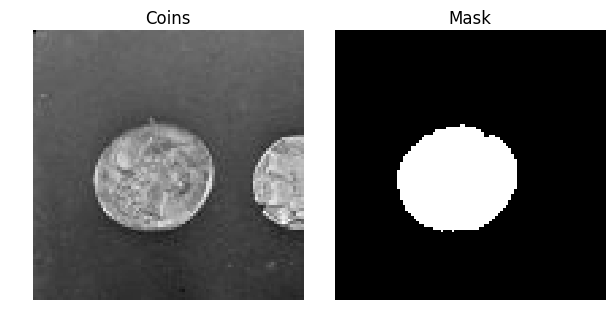

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(6, 3), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax0, ax1 = axes

ax0.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title('Coins')
ax1.imshow(mask, cmap=plt.cm.gray, interpolation='nearest')
ax1.set_title('Mask')

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=0.9, bottom=0, left=0, right=1)
plt.show()

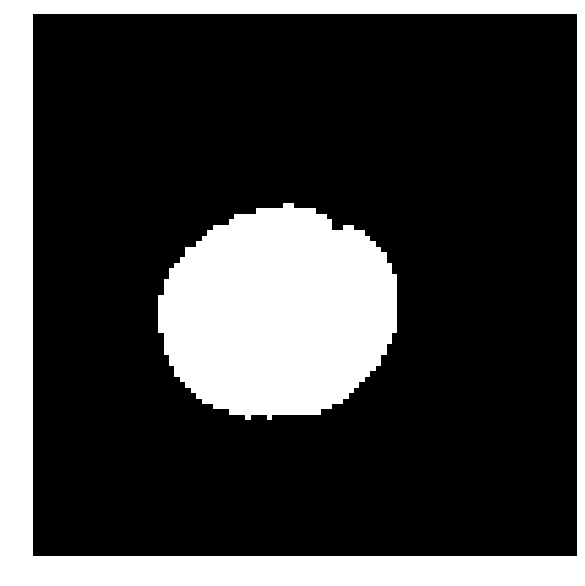

In [49]:
image(mask);

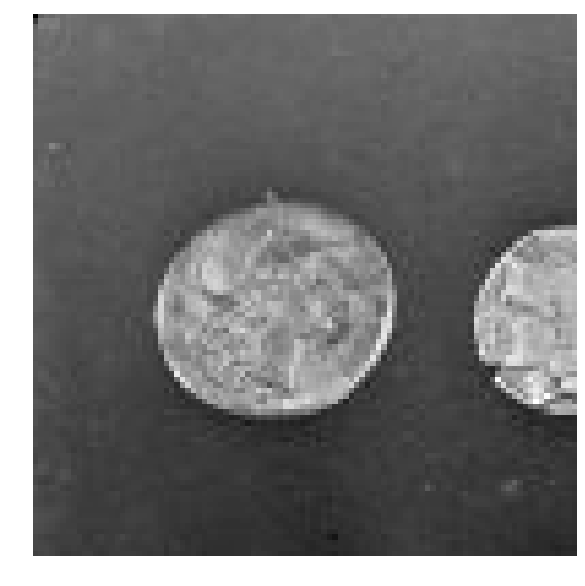

In [44]:
image(coins()[:100,:100]);

In [130]:
#img = norm(stack.mean(axis=0),0,100)
img = norm(stack[0],0,100)

regions = detect_wand(img)
blend = overlay(regions, image=img/2)

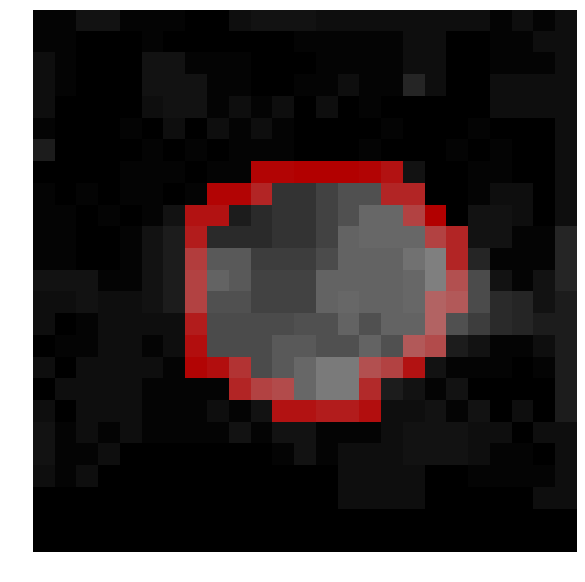

In [131]:
image(blend)

In [32]:
from numpy import pi
from cell_magic_wand import image_cart_to_polar, image_polar_to_cart

In [401]:
phase_width = int(2 * pi * 12 * 10)
polar_image = image_cart_to_polar(img, [img.shape[0]/2, img.shape[1]/2], 1, 12, phase_width=phase_width, zoom_factor=2)

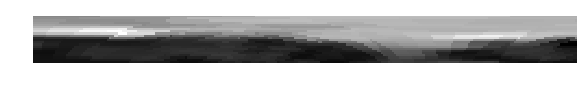

In [360]:
image(polar_image[:,:250]);

In [388]:
tmp = norm(median(norm(polar_image,0,100), rectangle(1,10)),25,75)

In [402]:
tmp = norm(polar_image,25,75)

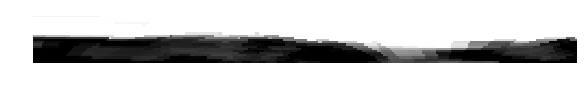

In [403]:
image(tmp[:,:250]);

In [404]:
from skimage.filters import sobel_h, sobel_v, sobel
edge_sobel = sobel_h(tmp)

In [405]:
edge_sobel = sobel_h(tmp)

In [406]:
wv = edge_sobel.max()-edge_sobel
wv[0,:] = 0

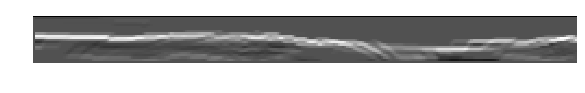

In [407]:
image(wv[:,:250]);

In [480]:
cart_mask = mask_polar_to_cart(wv, [img.shape[0]/2, img.shape[1]/2], 1, 11, img.shape, zoom_factor=2)

In [ ]:
cart_mask[img.shape[0]/2, img.shape[1]/2]

In [410]:
from skimage.morphology import watershed

In [463]:
markersC = zeros(img.shape)
markersC[img.shape[0]/2, img.shape[1]/2] = 1

markersE = zeros(img.shape)
markersE[0, :] = 1
markersE[-1, :] = 1
markersE[:, 0] = 1
markersE[:, -1] = 1

In [493]:
labels = watershed(tmp, 2*markersC + markersE)

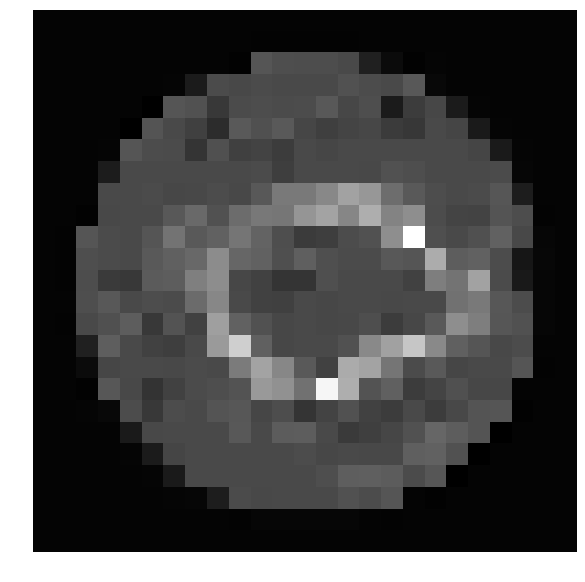

In [490]:
image(cart_mask)

In [491]:
tmp = sobel(img)

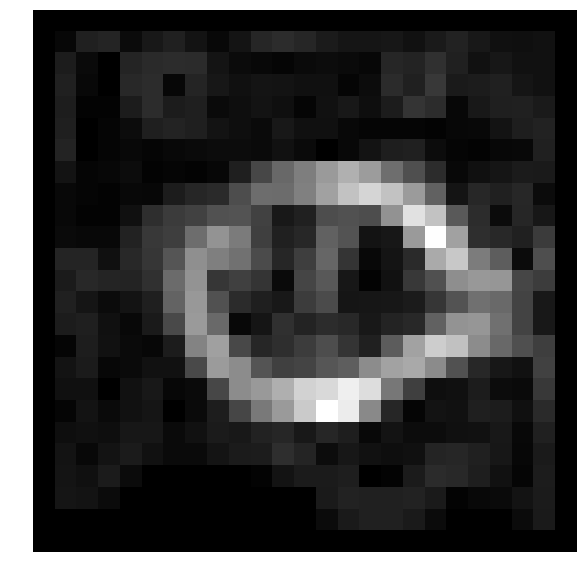

In [492]:
image(tmp)

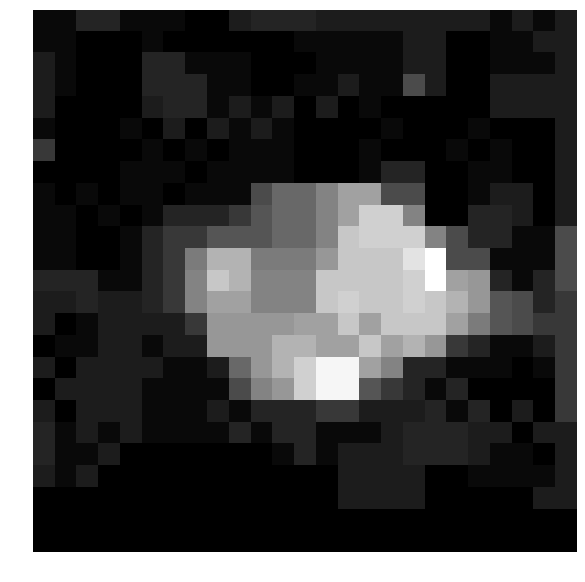

In [489]:
image(img)

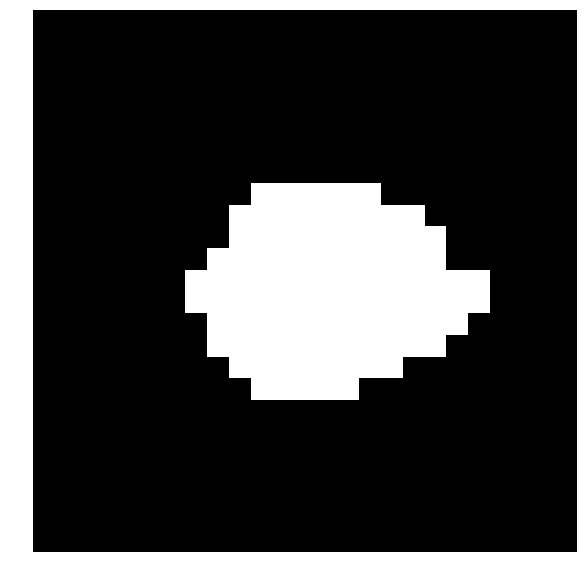

In [494]:
image(labels-1);

In [154]:
from skimage.feature import canny
from skimage.measure import find_contours

In [201]:
contours = find_contours(polar_image, 0.4)

(0, 600)

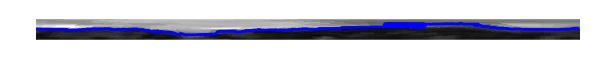

In [202]:
image(polar_image)
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.xlim([0, 600])

In [151]:
tmp = canny(polar_image, sigma=2)

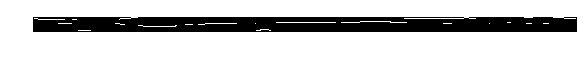

In [152]:
image(tmp[:,:]);

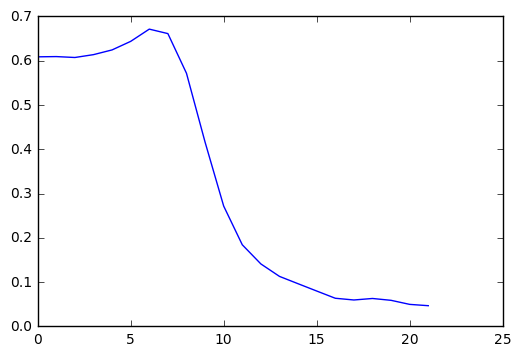

In [106]:
plt.plot(polar_image.mean(axis=1));

In [1113]:
def detect_wand_3d(image):
    roi = array(cell_magic_wand_3d(image, [image.shape[1]/2+1, image.shape[2]/2+1], 3, 10))
    x = where(roi)
    y = closing(one([[x[0][ii], x[1][ii]] for ii in range(len(x[0]))]),1)
    return ExtractionModel([y])

In [1114]:
from numpy import dstack

In [1115]:
from numpy import asarray

In [1116]:
modelWandList = [detect_wand_3d(dstack((avg[i], corr[i])).transpose(2,0,1)) for i in range(len(avg))]
modelWand = replacecenters(modelWandList, centercoords)
results = compare(modelWand, modelCompare, threshold = 5)
print(results)

{'exclusion': 0.61941367170393757, 'recall': 1.0, 'precision': 1.0, 'threshold': 5, 'inclusion': 0.89279599060866632}


### Quality controlling rois

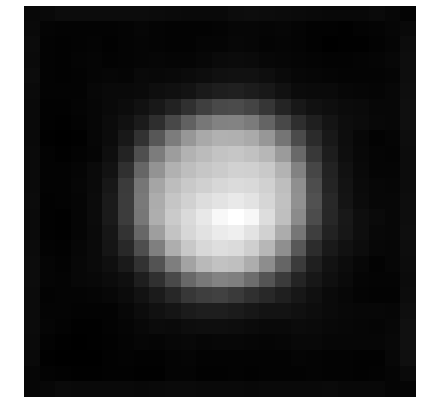

In [1105]:
templateLC = corr.mean(axis=0)
image(templateLC);

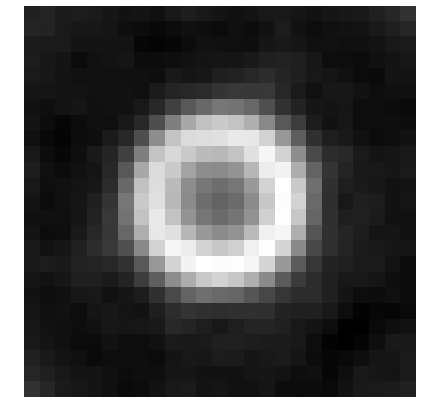

In [1104]:
template = avg.mean(axis=0)
template = template + template.T
image(template);

In [211]:
def qc(modelList, imageBlock):
    def qcR(region, image):
        return image[region.coordinates].mean()
    return [qcR(modelList[ii].regions[0], imageBlock[ii]) for ii in range(len(modelList))]

In [ ]:
def qc(modelList, imageBlock):
    def qcR(region, image):
        return image[region.coordinates].mean()
    return [qcR(modelList[ii].regions[0], imageBlock[ii]) for ii in range(len(modelList))]

In [676]:
qc_corr = qc(modelWandList, corr)

In [573]:
qc_corrRand = qc(modelWandList, corr)

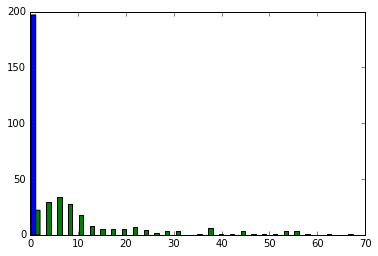

In [677]:
plt.hist([qc_corrRand, qc_corr], bins = 30);
#plt.hist(qc_corr, bins = 30);

### Evaluate

In [800]:
def detectcenters(corr, thresh, fwhm=8):
    template = makeGaussian(corr.shape[1], fwhm)
    rescaled = array([x*template for x in corr])
    return [ExtractionModel([array(where(x>thresh)).T]) for x in rescaled]

In [809]:
template = makeGaussian(corr.shape[1], 8)
rescaled = array([x*template for x in corr])*avg

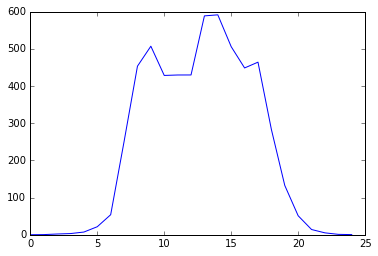

In [810]:
plt.plot(rescaled[0,13,:])

In [817]:
from numpy import linspace
d = []
vals = linspace(50, 300, 50)
for thresh in vals:
    modelList = detectcenters(corr*avg, thresh, fwhm=8)
    modelEmb = replacecenters(modelList, centercoords)
    results = compare(modelEmb, modelCompare, threshold = 5)
    d.append([results['inclusion'], results['exclusion']])
d = array(d)

In [818]:
from numpy import argmax
arg = argmax((d[:,0]**2+d[:,1]**2))
print(d[arg])
print(vals[arg])

[ 0.75844545  0.84235397]
141.836734694


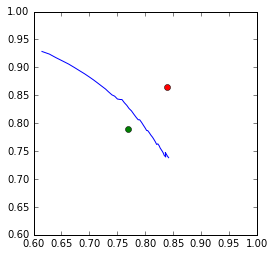

In [819]:
plt.figure(figsize=(4, 4))
plt.plot(d[:,0], d[:,1]);
#plt.plot(dd[:,0], dd[:,1]);

plt.plot(0.77, 0.79, marker='o');
plt.plot(0.839, 0.865, marker='o');

plt.xlim([0.6, 1]);
plt.ylim([0.6, 1]);

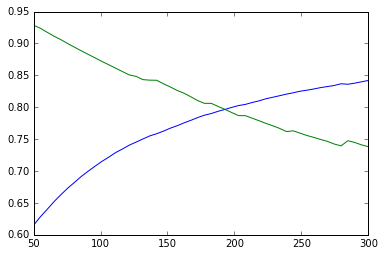

In [820]:
plt.plot(vals, d[:,0]);
plt.plot(vals, d[:,1]);

In [825]:
thresh = 100
modelList = detectcenters(corr*avg, thresh, fwhm=8)
modelEmb = replacecenters(modelList, centercoords)
compare(modelEmb, modelCompare, threshold = 5)

{'exclusion': 0.87304198450671822,
 'inclusion': 0.7134302534049749,
 'precision': 1.0,
 'recall': 1.0,
 'threshold': 5}

In [913]:
compareRegions = [many([array([y - round(x.center).astype('int') + [size+1, size+1] for y in x.coordinates])]) for x in modelCompare.regions]
blend = array([overlay(modelList[i].regions, image=avg[i], compare=compareRegions[i]) for i in range(avg.shape[0])])
#blend = array([overlay(newRegions[i], image=avg[i]) for i in range(avg.shape[0])])

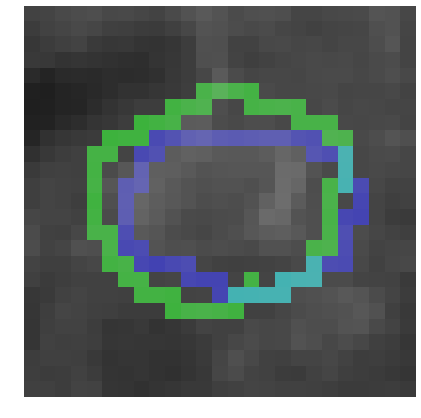

In [917]:
image(blend[16]);

In [66]:
path = '/tier2/freeman/Nick/neurofinder/neurofinder.02.00/results/Qgt-regions-zoom.tif'
imsave(path, (255*blend).astype('uint8'), plugin='tifffile', photometric='rgb')

In [1101]:
from numpy import concatenate
blendL = array([overlay(modelWandList[i].regions, image=avg[i], compare=modelWandListC[i].regions) for i in range(avg.shape[0])])
blendR = array([overlay(modelWandList[i].regions, image=norm(corr,3,99)[i], compare=modelWandListC[i].regions) for i in range(avg.shape[0])])
joined = concatenate((blendL, blendR), axis=2)

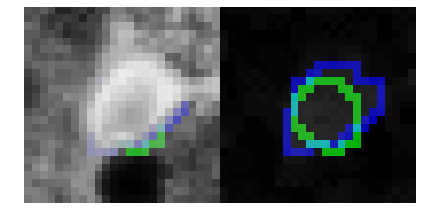

In [1102]:
image(joined[7]);

In [1103]:
path = '/tier2/freeman/Nick/neurofinder/neurofinder.02.00/results/avg_corr_wand3.tif'
imsave(path, (255*joined).astype('uint8'), plugin='tifffile', photometric='rgb')

In [107]:
modelEmbMerged = modelEmb.merge(overlap=0.1, max_iter=2, k_nearest=10)

In [108]:
print(modelEmb.regions.count)
print(modelEmbMerged.regions.count)

242
217


In [113]:
compare(modelEmbMerged, modelCompare, threshold = 5)

{'exclusion': 0.8738154055165005,
 'inclusion': 0.76165465977487201,
 'precision': 0.67005076142131981,
 'recall': 0.60829493087557607,
 'threshold': 5}

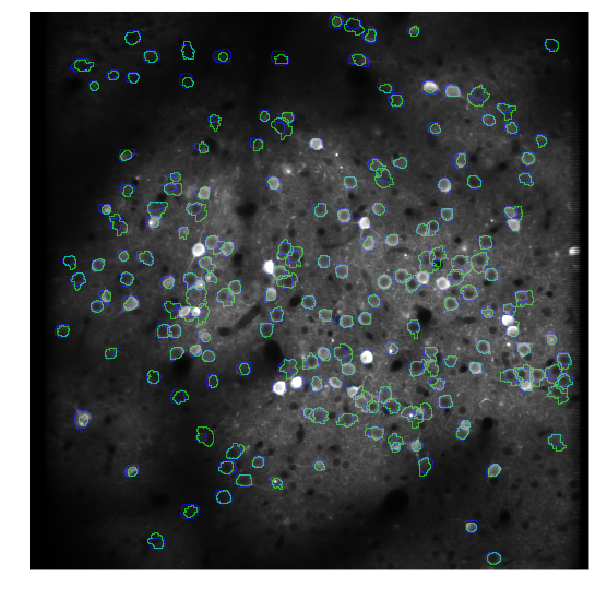

In [871]:
blend = overlay(modelWand.regions, image=mean, compare=modelCompare.regions, threshold=5, correct=False)
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
image(blend, ax=ax)
plt.xlim([0, blend.shape[1]]);
plt.ylim([blend.shape[0], 0]);

In [872]:
path = '/tier2/freeman/Nick/neurofinder/neurofinder.02.00/results/overlay-wand-avg.tif'
imsave(path, (255*blend).astype('uint8'), plugin='tifffile', photometric='rgb')

In [692]:
model.save('/tier2/freeman/Nick/neurofinder/neurofinder.02.00/regions/regions-gtBoundary.json')

In [29]:
from numpy import arange, newaxis, exp, log

def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.
    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = arange(0, size, 1, float)
    y = x[:, newaxis]
    
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]
    
    return exp(-4*log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [30]:
def detectcenters(corr, thresh, fwhm=8):
    template = makeGaussian(corr.shape[1], fwhm)
    rescaled = array([x*template for x in corr])
    return [ExtractionModel([array(where(x>thresh)).T]) for x in rescaled]

## Move to package

In [14]:
from numpy import maximum, percentile, full, nan, where, tile, inf, isnan
from neurofinder import match
from regional import many

In [15]:
def overlay(regions, image=None, compare=None, threshold=inf, correct=False):
    
    if image is not None:
        if image.max() > 1:
            clim = 3*percentile(image, 90)
            im = (image.astype(float)/clim).clip(0,1)
        else:
            im = image
        size = im.shape
    else:
        size = (max([r.bbox[2] for r in regions])+1, max([r.bbox[3] for r in regions])+1)
        if compare is not None:
            sizeCompare = (max([r.bbox[2] for r in compare])+1, max([r.bbox[3] for r in compare])+1)
            size = (maximum(size[0], sizeCompare[0]), maximum(size[1], sizeCompare[1]))
        im = full(size, 0.0)


    if compare is not None:
        matches = match(regions, compare, threshold)
        matchesCompare = full(compare.count,nan)
        
        for ii in where(~isnan(matches))[0]:
            matchesCompare[matches[ii]] = ii

        if any(~isnan(matches)):
            hits = many([regions[i] for i in where(~isnan(matches))[0]])
            #h = hits.mask(size, background='black', fill='green', stroke='white')
            h = hits.mask(size, background='black', fill=None, stroke=[0, 0.7, 0])
        else:
            h = full((size[0], size[1], 3), 0.0)
        if any(isnan(matches)):
            falseAlarms = many([regions[i] for i in where(isnan(matches))[0]])
            #fA = falseAlarms.mask(size, background='black', fill=[.7, 0, 0], stroke='white')
            fA = falseAlarms.mask(size, background='black', fill=None, stroke=[0.7, 0.7, 0])
        else:
            fA = full((size[0], size[1], 3), 0.0)
        if any(~isnan(matchesCompare)):
            truePositives = many([compare[i] for i in where(~isnan(matchesCompare))[0]])
            #tP = truePositives.mask(size, background='black', fill='blue', stroke='black')
            tP = truePositives.mask(size, background='black', fill=None, stroke=[0, 0, 0.7])
        else:
            tP = full((size[0], size[1], 3), 0.0)
        if any(isnan(matchesCompare)):
            misses = many([compare[i] for i in where(isnan(matchesCompare))[0]])
            #m = misses.mask(size, background='black', fill='red', stroke='black')
            m = misses.mask(size, background='black', fill=None, stroke=[0.7, 0, 0])
        else:
            m = full((size[0], size[1], 3), 0.0)
        if correct:
            mask = maximum(tP, h)            
        else:
            mask = maximum(maximum(maximum(tP, fA), h), m)
    else:
        #mask = regions.mask(size, background='black', fill=[.7, 0, 0], stroke='white')
        mask = regions.mask(size, background='black', fill=None, stroke=[.7, 0, 0])


    base = tile(im,(3,1,1)).transpose(1,2,0)
    return maximum(base, mask)

In [16]:
from neurofinder import centers, shapes

In [17]:
def compare(a, b, threshold=inf):
    recall, precision = centers(a.regions, b.regions, threshold)
    inclusion, exclusion = shapes(a.regions, b.regions, threshold)
    return {'recall':recall, 'precision':precision, 'inclusion':inclusion, 'exclusion':exclusion, 'threshold':threshold}